In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [2]:
path = 'ASTROSFINAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,Friday,Jan,0,No Game,No game
1,2010-01-02,13,Saturday,Jan,14,No Game,No game
2,2010-01-03,12,Sunday,Jan,0,No Game,No game
3,2010-01-04,9,Monday,Jan,14,No Game,No game
4,2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [7]:
df.drop(['date'], axis=1, inplace=True)

In [17]:
dft = df.copy()

# Encoder

In [18]:
encoder = preprocessing.LabelEncoder()
dft["weekday"] = encoder.fit_transform(dft["weekday"].fillna('Nan'))
dft["month"] = encoder.fit_transform(dft["month"].fillna('Nan'))
dft["game"] = encoder.fit_transform(dft["game"].fillna('Nan'))
dft["seasons"] = encoder.fit_transform(dft["seasons"].fillna('Nan'))

dft.head()

,sum_crimes,weekday,month,mode_hr,game,seasons
0,18,0,4,0,1,0
1,13,2,4,14,1,0
2,12,3,4,0,1,0
3,9,1,4,14,1,0
4,8,5,4,2,1,0


In [19]:
dft.game.unique()

array([1, 0, 2])

## Split game, no game

In [20]:
no_game = dft.game == 1

game = dft[~no_game]
nogame = dft[no_game]

In [51]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 94 to 2853
Data columns (total 6 columns):
sum_crimes    658 non-null int64
weekday       658 non-null int64
month         658 non-null int64
mode_hr       658 non-null int64
game          658 non-null int64
seasons       658 non-null int64
dtypes: int64(6)
memory usage: 56.0 KB


## TEST

In [11]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [26]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ mode_hr',game).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     19.71
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.06e-05
Time:                        21:24:38   Log-Likelihood:                -1845.9
No. Observations:                 658   AIC:                             3696.
Df Residuals:                     656   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8676      0.271     29.023      0.0

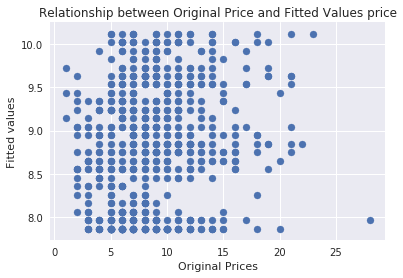

In [27]:

# your turn# your t 
plt.scatter(game.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

## sklearn

In [28]:
X = game.drop('sum_crimes', axis=1)
y = game['sum_crimes']

In [31]:
from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
lm = LinearRegression()


lm.fit(X,y)
prediction = lm.predict(X)

In [32]:

# The coefficients# The co 
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,weekday,-0.312059
1,month,0.016917
2,mode_hr,0.093046
3,game,-0.070945
4,seasons,-0.581001


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


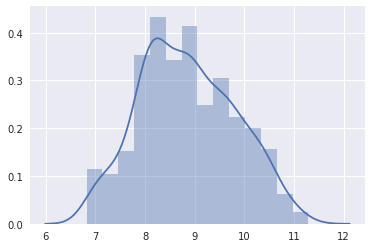

In [33]:
sns.distplot(lm.predict(X))

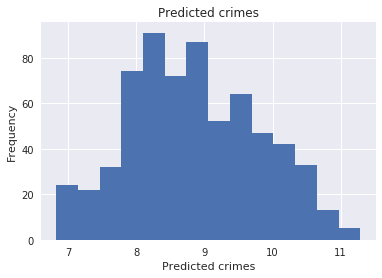

In [35]:

# your turn
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted crimes")
plt.xlabel("Predicted crimes")
plt.ylabel("Frequency")
plt.show()

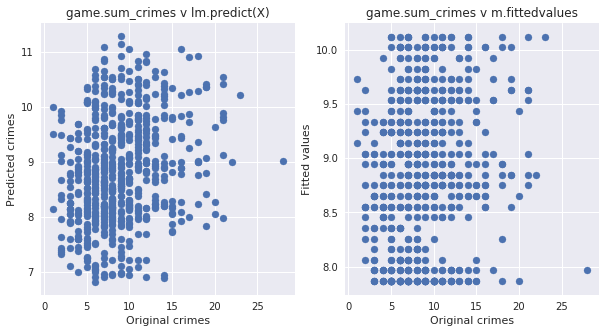

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1 = axes.flatten()

ax0.scatter(y, lm.predict(X))
ax0.set_xlabel("Original crimes")
ax0.set_ylabel("Predicted crimes")
ax0.set_title('game.sum_crimes v lm.predict(X)')
ax1.set_title('game.sum_crimes v m.fittedvalues')
ax1.scatter(y,m.fittedvalues)
ax1.set_xlabel("Original crimes")
ax1.set_ylabel("Fitted values")
plt.show()

In [39]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((y - prediction) ** 2)
ESS = np.sum(prediction - np.mean(y)) ** 2
R_sq = lm.score(X, y)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 10244.805125952562
Explained Sum-of-Squares ESS      : 5.793473374033633e-26
Coefficient of Determination R-sq : 0.05555238056801426


In [40]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.06535593486726876
Root Mean Squared Error: 3.7567554098457805


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.06535593486726876

In [42]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# regressor, feature data, target data, number of folds
#returns an array of cross-validaiton scores, 
cv_results = cross_val_score(reg,X,y,cv=5)
# the length of the array is the number of folts utilized
print(cv_results)  # R square, default score of linear regression

[-0.0398454   0.0274231   0.010355    0.00323768  0.06025189]


In [43]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.0398454   0.0274231   0.010355    0.00323768  0.06025189]
Average 5-Fold CV Score: 0.012284454597368733


In [44]:

# Import necessary modules# Import 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.04200286253802943
-0.034891005642558016


In [45]:
from sklearn.linear_model import Ridge

X_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)  # normalized=true all our variables are on teh same scale 

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.0642957221752899

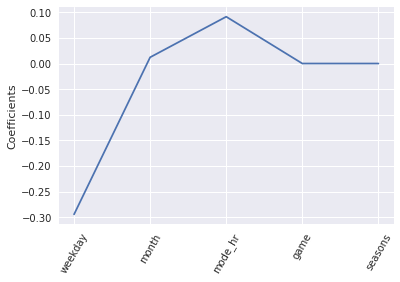

In [46]:
from sklearn.linear_model import Lasso
X = game.drop('sum_crimes', axis=1).values
y = game['sum_crimes'].values
names = game.drop('sum_crimes', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()

[-0.  0.  0. -0. -0.]


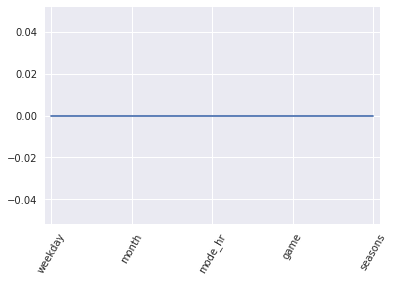

In [47]:
df_columns = game.drop('sum_crimes', axis=1).columns

# Import Lasso# Import 
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()

In [49]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


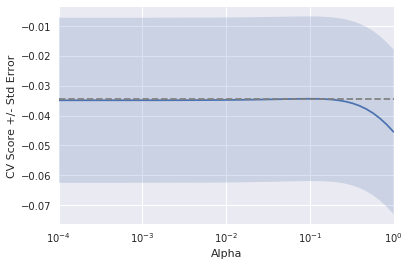

In [50]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)